In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [689]:
matches = pd.read_csv('matches_final.csv')

In [401]:
players=pd.read_excel(open('GL_IPL2020-2.xlsx', 'rb'), sheet_name='Ashu_NotPivot')
players_kind=pd.read_excel(open('GL_IPL2020.xlsx', 'rb'), sheet_name='Ashu_kind')

In [74]:
players

,Season,Team,Player Name,Batting,Bowling
0,2008,Chennai Super Kings,CK Kapugedera,0.188926,0.585054
1,2008,Chennai Super Kings,JA Morkel,0.792904,0.609262
2,2008,Chennai Super Kings,JDP Oram,0.434078,0.348269
3,2008,Chennai Super Kings,Joginder Sharma,0.440596,0.524330
4,2008,Chennai Super Kings,L Balaji,0.101026,0.584902
...,...,...,...,...,...
1804,2019,Sunrisers Hyderabad,Shakib Al Hasan,0.220952,0.435835
1805,2019,Sunrisers Hyderabad,V Shankar,0.571394,0.333571
1806,2019,Sunrisers Hyderabad,WP Saha,0.517851,0.786416
1807,2019,Sunrisers Hyderabad,YK Pathan,0.265480,0.720232


In [75]:
players_kind

,Player Name,Kind
0,A Chopra,Batsman
1,A Kumble,Bowler
2,A Mishra,Bowler
3,A Mukund,Batsman
4,A Nehra,Bowler
...,...,...
554,SD Lad,Batting
555,SE Rutherford,Batsman
556,SM Curran,All-rounder
557,SO Hetmyer,Batsman


In [76]:
players.columns

Index(['Season', 'Team', 'Player Name ', 'Batting', 'Bowling'], dtype='object')

In [402]:
players.rename(columns={'Player Name ':'Player_Name'}, inplace=True)
players_kind.rename(columns={'Player Name':'Player_Name'}, inplace=True)

In [403]:
players=players.merge(players_kind, on='Player_Name')

In [404]:
players.rename(columns={'Kind':'Role'}, inplace=True)

In [405]:
players=players[['Season', 'Player_Name', 'Role', 'Team', 'Batting', 'Bowling']]

In [690]:
teams=players[['Season', 'Team']].copy()

In [691]:
teams.drop_duplicates(inplace=True)

In [692]:
teams[teams.Team=='Gujarat Lions']

,Season,Team
87,2016,Gujarat Lions
88,2017,Gujarat Lions


In [573]:
players.Role.unique()

array(['batsman', 'all-rounder', 'bowler'], dtype=object)

In [574]:
players.replace('Batsman', 'batsman', inplace=True)
players.replace('Bastman', 'batsman', inplace=True)
players.replace('Batting', 'batsman', inplace=True)
players.replace('All-Rounder', 'all-rounder', inplace=True)
players.replace('All-rounder', 'all-rounder', inplace=True)
players.replace('Bowler', 'bowler', inplace=True)

In [575]:
players.replace('boe', 'bowler', inplace=True)

In [111]:
players.Player_Name[players.Season==2013][players.Team=='Chennai Super Kings']

6         JA Morkel
35       MEK Hussey
46         MS Dhoni
77      S Badrinath
84         SK Raina
456         WP Saha
497        DJ Bravo
620       RA Jadeja
775         M Vijay
784        R Ashwin
835       DP Nannes
1367     AS Rajpoot
1372     B Laughlin
1374      CH Morris
1380      JO Holder
1382      MM Sharma
Name: Player_Name, dtype: object

In [548]:
def required(df):
    if df.Role=='batsman':
        df.Bowling=np.nan
    elif df.Role=='bowler':
        df.Batting=np.nan
    return df
players = players.apply(required, axis=1)

In [109]:
players

,Season,Player_Name,Role,Team,Batting,Bowling
0,2008,CK Kapugedera,batsman,Chennai Super Kings,0.188926,NaN
1,2008,JA Morkel,all-rounder,Chennai Super Kings,0.792904,0.609262
2,2009,JA Morkel,all-rounder,Chennai Super Kings,0.542317,0.525859
3,2010,JA Morkel,all-rounder,Chennai Super Kings,0.745100,0.447022
4,2011,JA Morkel,all-rounder,Chennai Super Kings,0.563788,0.545529
...,...,...,...,...,...,...
1802,2019,NA Saini,bowler,Royal Challengers Bangalore,NaN,0.490870
1803,2019,S Dube,all-rounder,Royal Challengers Bangalore,0.352282,0.781311
1804,2019,SO Hetmyer,batsman,Royal Challengers Bangalore,0.428272,NaN
1805,2019,JM Bairstow,batsman,Sunrisers Hyderabad,0.908044,NaN


In [412]:
CSK_2013=list(players.Player_Name[players.Season==2013][players.Team=='Chennai Super Kings'])
CSK_2013

['JA Morkel',
 'MEK Hussey',
 'MS Dhoni',
 'S Badrinath',
 'SK Raina',
 'WP Saha',
 'DJ Bravo',
 'RA Jadeja',
 'M Vijay',
 'R Ashwin',
 'DP Nannes',
 'AS Rajpoot',
 'B Laughlin',
 'CH Morris',
 'JO Holder',
 'MM Sharma']

In [413]:
players[players.Season<2013][players.Player_Name=='JA Morkel'].mean()

<ipython-input-413-e4d6012dc30f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  players[players.Season<2013][players.Player_Name=='JA Morkel'].mean()


Season     2010.000000
Batting       0.628348
Bowling       0.531312
dtype: float64

In [414]:
list(players[players.Season<2013][players.Player_Name=='JA Morkel'].mean()[1:3])

<ipython-input-414-1f1d7b972a42>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(players[players.Season<2013][players.Player_Name=='JA Morkel'].mean()[1:3])


[0.6283477997622953, 0.5313123579067331]

In [415]:
stats

array([[0.60788202,        nan],
       [0.8547946 ,        nan],
       [       nan, 0.56736   ],
       [       nan, 0.66522776],
       [0.76947323,        nan],
       [0.73251972, 0.47882555],
       [       nan, 0.50260038],
       [       nan, 0.43641317],
       [       nan, 0.51183395],
       [0.39526267, 0.5741321 ],
       [0.85176916,        nan],
       [0.38437556, 0.26373959],
       [       nan, 0.58973015],
       [0.67084376,        nan],
       [0.85589838, 0.48396586],
       [0.67719627, 0.77977053]])

In [185]:
rate = np.nanmean(stats, axis=0)

In [207]:
rate

array([0.70099555, 0.56339356])

In [693]:
teams

,Season,Team
0,2008,Chennai Super Kings
2,2009,Chennai Super Kings
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Chennai Super Kings
...,...,...
590,2008,Rajasthan Royals
593,2009,Rajasthan Royals
594,2010,Rajasthan Royals
666,2008,Royal Challengers Bangalore


In [694]:
teams.sort_values('Season')

,Season,Team
0,2008,Chennai Super Kings
171,2008,Delhi Daredevils
283,2008,Kings XI Punjab
666,2008,Royal Challengers Bangalore
92,2008,Deccan Chargers
...,...,...
134,2019,Mumbai Indians
489,2019,Rajasthan Royals
182,2019,Delhi Capitals
224,2019,Kolkata Knight Riders


In [695]:
teams=teams[teams.Season>=2013]

In [696]:
teams['batting']=np.empty((teams.shape[0],1), dtype=float)
teams['bowling']=np.empty((teams.shape[0],1), dtype=float)

<ipython-input-696-72c4e35e2e91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams['batting']=np.empty((teams.shape[0],1), dtype=float)
<ipython-input-696-72c4e35e2e91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams['bowling']=np.empty((teams.shape[0],1), dtype=float)


In [697]:
teams

,Season,Team,batting,bowling
6,2013,Chennai Super Kings,2.470328e-323,2.470328e-323
7,2014,Royal Challengers Bangalore,2.964394e-323,2.964394e-323
8,2015,Delhi Daredevils,3.458460e-323,3.458460e-323
9,2016,Rising Pune Supergiants,3.952525e-323,3.952525e-323
21,2013,Kolkata Knight Riders,5.928788e-323,5.928788e-323
22,2014,Kings XI Punjab,6.422853e-323,6.422853e-323
28,2013,Royal Challengers Bangalore,7.905050e-323,7.905050e-323
36,2014,Mumbai Indians,8.399116e-323,8.399116e-323
37,2015,Chennai Super Kings,8.893182e-323,8.893182e-323
47,2014,Chennai Super Kings,9.387247e-323,9.387247e-323


In [698]:
teams.reset_index(drop=True, inplace=True)

In [699]:
teams

,Season,Team,batting,bowling
0,2013,Chennai Super Kings,2.470328e-323,2.470328e-323
1,2014,Royal Challengers Bangalore,2.964394e-323,2.964394e-323
2,2015,Delhi Daredevils,3.458460e-323,3.458460e-323
3,2016,Rising Pune Supergiants,3.952525e-323,3.952525e-323
4,2013,Kolkata Knight Riders,5.928788e-323,5.928788e-323
5,2014,Kings XI Punjab,6.422853e-323,6.422853e-323
6,2013,Royal Challengers Bangalore,7.905050e-323,7.905050e-323
7,2014,Mumbai Indians,8.399116e-323,8.399116e-323
8,2015,Chennai Super Kings,8.893182e-323,8.893182e-323
9,2014,Chennai Super Kings,9.387247e-323,9.387247e-323


In [583]:
teams[teams.Season==2013][teams.Team=='Chennai Super Kings'].iloc[0,2]=rate[0]
teams.bowling[teams.Season==2013][teams.Team=='Chennai Super Kings']=rate[1]

IndexError: invalid index to scalar variable.

In [584]:
teams

,Season,Team,batting,bowling
0,2011,Chennai Super Kings,1.482197e-323,1.482197e-323
1,2012,Chennai Super Kings,1.976263e-323,1.976263e-323
2,2013,Chennai Super Kings,2.470328e-323,2.470328e-323
3,2014,Royal Challengers Bangalore,2.964394e-323,2.964394e-323
4,2015,Delhi Daredevils,3.458460e-323,3.458460e-323
...,...,...,...,...
71,2019,Sunrisers Hyderabad,4.347778e-322,4.347778e-322
72,2015,Rajasthan Royals,4.446591e-322,4.446591e-322
73,2018,Rajasthan Royals,4.495997e-322,4.495997e-322
74,2019,Rajasthan Royals,4.545404e-322,4.545404e-322


In [700]:
teams=teams.sort_values(['Season', 'Team'])

In [701]:
teams.reset_index(drop=True, inplace=True)

In [702]:
teams

,Season,Team,batting,bowling
0,2013,Chennai Super Kings,2.470328e-323,2.470328e-323
1,2013,Delhi Daredevils,2.322109e-322,2.322109e-322
2,2013,Kings XI Punjab,1.235164e-322,1.235164e-322
3,2013,Kolkata Knight Riders,5.928788e-323,5.928788e-323
4,2013,Mumbai Indians,2.025669e-322,2.025669e-322
5,2013,Pune Warriors,4.100745e-322,4.100745e-322
6,2013,Rajasthan Royals,3.903119e-322,3.903119e-322
7,2013,Royal Challengers Bangalore,7.905050e-323,7.905050e-323
8,2013,Sunrisers Hyderabad,1.284571e-322,1.284571e-322
9,2014,Chennai Super Kings,9.387247e-323,9.387247e-323


In [703]:
team_names=list(teams.Team.unique())
team_names

['Chennai Super Kings',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Delhi Capitals']

In [704]:
teams.set_index(['Season', 'Team'], inplace=True)

In [705]:
rate

array([0.54634777, 0.54197753])

In [706]:
teams.loc[(2013, 'Chennai Super Kings')]=rate

In [707]:
teams

batting        bowling
Season Team                                                     
2013   Chennai Super Kings           5.463478e-01   5.419775e-01
       Delhi Daredevils             2.322109e-322  2.322109e-322
       Kings XI Punjab              1.235164e-322  1.235164e-322
       Kolkata Knight Riders        5.928788e-323  5.928788e-323
       Mumbai Indians               2.025669e-322  2.025669e-322
       Pune Warriors                4.100745e-322  4.100745e-322
       Rajasthan Royals             3.903119e-322  3.903119e-322
       Royal Challengers Bangalore  7.905050e-323  7.905050e-323
       Sunrisers Hyderabad          1.284571e-322  1.284571e-322
2014   Chennai Super Kings          9.387247e-323  9.387247e-323
       Delhi Daredevils             3.112614e-322  3.112614e-322
       Kings XI Punjab              6.422853e-323  6.422853e-323
       Kolkata Knight Riders        2.371515e-322  2.371515e-322
       Mumbai Indians               8.399116e-323  8.399116e-323
       Rajasthan Royals             3.359646e-322  3.359646e-322
       Royal Challengers Bangalore  2.964394e-323  2.964394e-323
       Sunrisers Hyderabad          2.569141e-322  2.569141e-322
2015   Chennai Super Kings          8.893182e-323  8.893182e-323
       Delhi Daredevils             3.458460e-323  3.458460e-323
       Kings XI Punjab              3.705492e-322  3.705492e-322
       Kolkata Knight Riders        2.420922e-322  2.420922e-322
       Mumbai Indians               1.333977e-322  1.333977e-322
       Rajasthan Royals             4.446591e-322  4.446591e-322
       Royal Challengers Bangalore  2.964394e-322  2.964394e-322
       Sunrisers Hyderabad          3.507866e-322  3.507866e-322
2016   Delhi Daredevils             2.717361e-322  2.717361e-322
       Gujarat Lions                1.581010e-322  1.581010e-322
       Kings XI Punjab              3.952525e-322  3.952525e-322
       Kolkata Knight Riders        2.470328e-322  2.470328e-322
       Mumbai Indians               1.383384e-322  1.383384e-322
       Rising Pune Supergiants      3.952525e-323  3.952525e-323
       Royal Challengers Bangalore  3.013800e-322  3.013800e-322
       Sunrisers Hyderabad          3.557273e-322  3.557273e-322
2017   Delhi Daredevils             2.766768e-322  2.766768e-322
       Gujarat Lions                1.630417e-322  1.630417e-322
       Kings XI Punjab              4.001932e-322  4.001932e-322
       Kolkata Knight Riders        2.519735e-322  2.519735e-322
       Mumbai Indians               1.432790e-322  1.432790e-322
       Rising Pune Supergiants      9.881313e-323  9.881313e-323
       Royal Challengers Bangalore  3.063207e-322  3.063207e-322
       Sunrisers Hyderabad          3.606679e-322  3.606679e-322
2018   Chennai Super Kings          1.037538e-322  1.037538e-322
       Delhi Daredevils             2.816174e-322  2.816174e-322
       Kings XI Punjab              3.310240e-322  3.310240e-322
       Kolkata Knight Riders        3.162020e-322  3.162020e-322
       Mumbai Indians               2.075076e-322  2.075076e-322
       Rajasthan Royals             4.495997e-322  4.495997e-322
       Royal Challengers Bangalore  1.482197e-322  1.482197e-322
       Sunrisers Hyderabad          3.656086e-322  3.656086e-322
2019   Chennai Super Kings          1.086944e-322  1.086944e-322
       Delhi Capitals               2.865581e-322  2.865581e-322
       Kings XI Punjab              4.891250e-322  4.891250e-322
       Kolkata Knight Riders        3.211427e-322  3.211427e-322
       Mumbai Indians               2.124482e-322  2.124482e-322
       Rajasthan Royals             4.545404e-322  4.545404e-322
       Royal Challengers Bangalore  1.531604e-322  1.531604e-322
       Sunrisers Hyderabad          4.347778e-322  4.347778e-322

In [242]:
rate

array([0.70099555, 0.56339356])

In [592]:
#team_names=teams.Team.unique()
team_names

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Delhi Capitals']

In [708]:
for year in range(2013, 2020):
    for team in team_names:
        player_list=list(players.Player_Name[players.Season==year][players.Team==team])
        stats=[]
        for player in player_list:
            stats.append(list(players[players.Season<year][players.Player_Name==player].mean()[1:3]))
        stats=np.array(stats)
        rate = np.nanmean(stats, axis=0)
        try:
            teams.loc[(year, team)][0:2]=rate
        except KeyError:
            pass

<ipython-input-708-fe423a1a01e8>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stats.append(list(players[players.Season<year][players.Player_Name==player].mean()[1:3]))
<ipython-input-708-fe423a1a01e8>:8: RuntimeWarning: Mean of empty slice
  rate = np.nanmean(stats, axis=0)


In [709]:
teams

batting   bowling
Season Team                                           
2013   Chennai Super Kings          0.700996  0.563394
       Delhi Daredevils             0.589682  0.517458
       Kings XI Punjab              0.605505  0.546620
       Kolkata Knight Riders        0.508325  0.507414
       Mumbai Indians               0.588731  0.560492
       Pune Warriors                0.526283  0.555406
       Rajasthan Royals             0.508160  0.573701
       Royal Challengers Bangalore  0.576973  0.503214
       Sunrisers Hyderabad          0.526781  0.549339
2014   Chennai Super Kings          0.682068  0.597171
       Delhi Daredevils             0.545704  0.510349
       Kings XI Punjab              0.575733  0.562134
       Kolkata Knight Riders        0.606350  0.553804
       Mumbai Indians               0.698281  0.558525
       Rajasthan Royals             0.540582  0.510689
       Royal Challengers Bangalore  0.664867  0.561178
       Sunrisers Hyderabad          0.551929  0.550415
2015   Chennai Super Kings          0.689322  0.552289
       Delhi Daredevils             0.587354  0.584135
       Kings XI Punjab              0.568604  0.575227
       Kolkata Knight Riders        0.544241  0.566994
       Mumbai Indians               0.682436  0.506933
       Rajasthan Royals             0.583325  0.552554
       Royal Challengers Bangalore  0.590198  0.565827
       Sunrisers Hyderabad          0.529260  0.544463
2016   Delhi Daredevils             0.518109  0.564834
       Gujarat Lions                0.654075  0.517524
       Kings XI Punjab              0.579895  0.536343
       Kolkata Knight Riders        0.544445  0.521423
       Mumbai Indians               0.716644  0.457414
       Rising Pune Supergiants      0.606165  0.527076
       Royal Challengers Bangalore  0.512922  0.577315
       Sunrisers Hyderabad          0.561141  0.538307
2017   Delhi Daredevils             0.515272  0.476391
       Gujarat Lions                0.621963  0.512950
       Kings XI Punjab              0.589333  0.506369
       Kolkata Knight Riders        0.557844  0.564576
       Mumbai Indians               0.680002  0.532145
       Rising Pune Supergiants      0.618851  0.612206
       Royal Challengers Bangalore  0.565528  0.598008
       Sunrisers Hyderabad          0.594285  0.541225
2018   Chennai Super Kings          0.667247  0.549673
       Delhi Daredevils             0.576014  0.535633
       Kings XI Punjab              0.610168  0.580686
       Kolkata Knight Riders        0.611617  0.588881
       Mumbai Indians               0.663676  0.502130
       Rajasthan Royals             0.673402  0.541434
       Royal Challengers Bangalore  0.561028  0.564018
       Sunrisers Hyderabad          0.527516  0.540643
2019   Chennai Super Kings          0.696045  0.571902
       Delhi Capitals               0.546348  0.541978
       Kings XI Punjab              0.609648  0.614265
       Kolkata Knight Riders        0.575192  0.604667
       Mumbai Indians               0.611253  0.533918
       Rajasthan Royals             0.563771  0.583377
       Royal Challengers Bangalore  0.506479  0.492857
       Sunrisers Hyderabad          0.598034  0.563492

In [710]:
matches

,season,team1,team2,result,winner
0,2008,Kolkata Knight Riders,Royal Challengers Bangalore,normal,Kolkata Knight Riders
1,2008,Chennai Super Kings,Kings XI Punjab,normal,Chennai Super Kings
2,2008,Rajasthan Royals,Delhi Daredevils,normal,Delhi Daredevils
3,2008,Mumbai Indians,Royal Challengers Bangalore,normal,Royal Challengers Bangalore
4,2008,Deccan Chargers,Kolkata Knight Riders,normal,Kolkata Knight Riders
...,...,...,...,...,...
751,2019,Kolkata Knight Riders,Mumbai Indians,normal,Mumbai Indians
752,2019,Chennai Super Kings,Mumbai Indians,normal,Mumbai Indians
753,2019,Sunrisers Hyderabad,Delhi Capitals,normal,Delhi Capitals
754,2019,Delhi Capitals,Chennai Super Kings,normal,Chennai Super Kings


In [711]:
matches=matches[matches.season>=2013]

In [712]:
matches

,season,team1,team2,result,winner
322,2013,Delhi Daredevils,Kolkata Knight Riders,normal,Kolkata Knight Riders
323,2013,Royal Challengers Bangalore,Mumbai Indians,normal,Royal Challengers Bangalore
324,2013,Sunrisers Hyderabad,Pune Warriors,normal,Sunrisers Hyderabad
325,2013,Rajasthan Royals,Delhi Daredevils,normal,Rajasthan Royals
326,2013,Mumbai Indians,Chennai Super Kings,normal,Mumbai Indians
...,...,...,...,...,...
751,2019,Kolkata Knight Riders,Mumbai Indians,normal,Mumbai Indians
752,2019,Chennai Super Kings,Mumbai Indians,normal,Mumbai Indians
753,2019,Sunrisers Hyderabad,Delhi Capitals,normal,Delhi Capitals
754,2019,Delhi Capitals,Chennai Super Kings,normal,Chennai Super Kings


In [713]:
matches.dropna(inplace=True)

<ipython-input-713-77ec5664e32d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.dropna(inplace=True)


In [714]:
matches.drop(columns=['result'], inplace=True)

C:\Users\Sarda\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [715]:
matches

,season,team1,team2,winner
322,2013,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders
323,2013,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
324,2013,Sunrisers Hyderabad,Pune Warriors,Sunrisers Hyderabad
325,2013,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals
326,2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians
...,...,...,...,...
751,2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
752,2019,Chennai Super Kings,Mumbai Indians,Mumbai Indians
753,2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals
754,2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


In [716]:
def winner(df):
    if df.winner==df.team1:
        return 1
    else:
        return -1
matches['winner']=matches.apply(winner, axis=1)

<ipython-input-716-191748511ca6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['winner']=matches.apply(winner, axis=1)


In [717]:
matches

,season,team1,team2,winner
322,2013,Delhi Daredevils,Kolkata Knight Riders,-1
323,2013,Royal Challengers Bangalore,Mumbai Indians,1
324,2013,Sunrisers Hyderabad,Pune Warriors,1
325,2013,Rajasthan Royals,Delhi Daredevils,1
326,2013,Mumbai Indians,Chennai Super Kings,1
...,...,...,...,...
751,2019,Kolkata Knight Riders,Mumbai Indians,-1
752,2019,Chennai Super Kings,Mumbai Indians,-1
753,2019,Sunrisers Hyderabad,Delhi Capitals,-1
754,2019,Delhi Capitals,Chennai Super Kings,-1


In [718]:
teams.reset_index(inplace=True)

In [719]:
teams

,Season,Team,batting,bowling
0,2013,Chennai Super Kings,0.700996,0.563394
1,2013,Delhi Daredevils,0.589682,0.517458
2,2013,Kings XI Punjab,0.605505,0.546620
3,2013,Kolkata Knight Riders,0.508325,0.507414
4,2013,Mumbai Indians,0.588731,0.560492
5,2013,Pune Warriors,0.526283,0.555406
6,2013,Rajasthan Royals,0.508160,0.573701
7,2013,Royal Challengers Bangalore,0.576973,0.503214
8,2013,Sunrisers Hyderabad,0.526781,0.549339
9,2014,Chennai Super Kings,0.682068,0.597171


In [720]:
matches.team1.unique()

array(['Delhi Daredevils', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Mumbai Indians',
       'Pune Warriors', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [721]:
matches.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)

C:\Users\Sarda\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [722]:
data = pd.merge(matches, teams, left_on=['season', 'team1'], right_on=['Season', 'Team'], how='left')

In [723]:
data

,season,team1,team2,winner,Season,Team,batting,bowling
0,2013,Delhi Daredevils,Kolkata Knight Riders,-1,2013,Delhi Daredevils,0.589682,0.517458
1,2013,Royal Challengers Bangalore,Mumbai Indians,1,2013,Royal Challengers Bangalore,0.576973,0.503214
2,2013,Sunrisers Hyderabad,Pune Warriors,1,2013,Sunrisers Hyderabad,0.526781,0.549339
3,2013,Rajasthan Royals,Delhi Daredevils,1,2013,Rajasthan Royals,0.508160,0.573701
4,2013,Mumbai Indians,Chennai Super Kings,1,2013,Mumbai Indians,0.588731,0.560492
...,...,...,...,...,...,...,...,...
426,2019,Kolkata Knight Riders,Mumbai Indians,-1,2019,Kolkata Knight Riders,0.575192,0.604667
427,2019,Chennai Super Kings,Mumbai Indians,-1,2019,Chennai Super Kings,0.696045,0.571902
428,2019,Sunrisers Hyderabad,Delhi Capitals,-1,2019,Sunrisers Hyderabad,0.598034,0.563492
429,2019,Delhi Capitals,Chennai Super Kings,-1,2019,Delhi Capitals,0.546348,0.541978


In [724]:
data.drop(columns='Team', inplace=True)

In [725]:
data.rename(columns={'batting':'bat1', 'bowling':'bowl1'}, inplace=True)

In [726]:
data

,season,team1,team2,winner,Season,bat1,bowl1
0,2013,Delhi Daredevils,Kolkata Knight Riders,-1,2013,0.589682,0.517458
1,2013,Royal Challengers Bangalore,Mumbai Indians,1,2013,0.576973,0.503214
2,2013,Sunrisers Hyderabad,Pune Warriors,1,2013,0.526781,0.549339
3,2013,Rajasthan Royals,Delhi Daredevils,1,2013,0.508160,0.573701
4,2013,Mumbai Indians,Chennai Super Kings,1,2013,0.588731,0.560492
...,...,...,...,...,...,...,...
426,2019,Kolkata Knight Riders,Mumbai Indians,-1,2019,0.575192,0.604667
427,2019,Chennai Super Kings,Mumbai Indians,-1,2019,0.696045,0.571902
428,2019,Sunrisers Hyderabad,Delhi Capitals,-1,2019,0.598034,0.563492
429,2019,Delhi Capitals,Chennai Super Kings,-1,2019,0.546348,0.541978


In [727]:
data = pd.merge(data, teams, left_on=['season', 'team2'], right_on=['Season', 'Team'], how='left')

In [728]:
data

,season,team1,team2,winner,Season_x,bat1,bowl1,Season_y,Team,batting,bowling
0,2013,Delhi Daredevils,Kolkata Knight Riders,-1,2013,0.589682,0.517458,2013,Kolkata Knight Riders,0.508325,0.507414
1,2013,Royal Challengers Bangalore,Mumbai Indians,1,2013,0.576973,0.503214,2013,Mumbai Indians,0.588731,0.560492
2,2013,Sunrisers Hyderabad,Pune Warriors,1,2013,0.526781,0.549339,2013,Pune Warriors,0.526283,0.555406
3,2013,Rajasthan Royals,Delhi Daredevils,1,2013,0.508160,0.573701,2013,Delhi Daredevils,0.589682,0.517458
4,2013,Mumbai Indians,Chennai Super Kings,1,2013,0.588731,0.560492,2013,Chennai Super Kings,0.700996,0.563394
...,...,...,...,...,...,...,...,...,...,...,...
426,2019,Kolkata Knight Riders,Mumbai Indians,-1,2019,0.575192,0.604667,2019,Mumbai Indians,0.611253,0.533918
427,2019,Chennai Super Kings,Mumbai Indians,-1,2019,0.696045,0.571902,2019,Mumbai Indians,0.611253,0.533918
428,2019,Sunrisers Hyderabad,Delhi Capitals,-1,2019,0.598034,0.563492,2019,Delhi Capitals,0.546348,0.541978
429,2019,Delhi Capitals,Chennai Super Kings,-1,2019,0.546348,0.541978,2019,Chennai Super Kings,0.696045,0.571902


In [729]:
data.drop(columns='Team', inplace=True)

In [730]:
data.rename(columns={'batting':'bat2', 'bowling':'bowl2'}, inplace=True)

In [731]:
data

,season,team1,team2,winner,Season_x,bat1,bowl1,Season_y,bat2,bowl2
0,2013,Delhi Daredevils,Kolkata Knight Riders,-1,2013,0.589682,0.517458,2013,0.508325,0.507414
1,2013,Royal Challengers Bangalore,Mumbai Indians,1,2013,0.576973,0.503214,2013,0.588731,0.560492
2,2013,Sunrisers Hyderabad,Pune Warriors,1,2013,0.526781,0.549339,2013,0.526283,0.555406
3,2013,Rajasthan Royals,Delhi Daredevils,1,2013,0.508160,0.573701,2013,0.589682,0.517458
4,2013,Mumbai Indians,Chennai Super Kings,1,2013,0.588731,0.560492,2013,0.700996,0.563394
...,...,...,...,...,...,...,...,...,...,...
426,2019,Kolkata Knight Riders,Mumbai Indians,-1,2019,0.575192,0.604667,2019,0.611253,0.533918
427,2019,Chennai Super Kings,Mumbai Indians,-1,2019,0.696045,0.571902,2019,0.611253,0.533918
428,2019,Sunrisers Hyderabad,Delhi Capitals,-1,2019,0.598034,0.563492,2019,0.546348,0.541978
429,2019,Delhi Capitals,Chennai Super Kings,-1,2019,0.546348,0.541978,2019,0.696045,0.571902


In [732]:
data.drop(columns=['Season_x', 'Season_y'], inplace=True)

In [733]:
data

,season,team1,team2,winner,bat1,bowl1,bat2,bowl2
0,2013,Delhi Daredevils,Kolkata Knight Riders,-1,0.589682,0.517458,0.508325,0.507414
1,2013,Royal Challengers Bangalore,Mumbai Indians,1,0.576973,0.503214,0.588731,0.560492
2,2013,Sunrisers Hyderabad,Pune Warriors,1,0.526781,0.549339,0.526283,0.555406
3,2013,Rajasthan Royals,Delhi Daredevils,1,0.508160,0.573701,0.589682,0.517458
4,2013,Mumbai Indians,Chennai Super Kings,1,0.588731,0.560492,0.700996,0.563394
...,...,...,...,...,...,...,...,...
426,2019,Kolkata Knight Riders,Mumbai Indians,-1,0.575192,0.604667,0.611253,0.533918
427,2019,Chennai Super Kings,Mumbai Indians,-1,0.696045,0.571902,0.611253,0.533918
428,2019,Sunrisers Hyderabad,Delhi Capitals,-1,0.598034,0.563492,0.546348,0.541978
429,2019,Delhi Capitals,Chennai Super Kings,-1,0.546348,0.541978,0.696045,0.571902


In [734]:
data['bat']=data.bat1-data.bat2
data['bowl']=data.bowl1-data.bowl2

In [735]:
data

,season,team1,team2,winner,bat1,bowl1,bat2,bowl2,bat,bowl
0,2013,Delhi Daredevils,Kolkata Knight Riders,-1,0.589682,0.517458,0.508325,0.507414,0.081357,0.010044
1,2013,Royal Challengers Bangalore,Mumbai Indians,1,0.576973,0.503214,0.588731,0.560492,-0.011757,-0.057279
2,2013,Sunrisers Hyderabad,Pune Warriors,1,0.526781,0.549339,0.526283,0.555406,0.000499,-0.006067
3,2013,Rajasthan Royals,Delhi Daredevils,1,0.508160,0.573701,0.589682,0.517458,-0.081522,0.056243
4,2013,Mumbai Indians,Chennai Super Kings,1,0.588731,0.560492,0.700996,0.563394,-0.112265,-0.002901
...,...,...,...,...,...,...,...,...,...,...
426,2019,Kolkata Knight Riders,Mumbai Indians,-1,0.575192,0.604667,0.611253,0.533918,-0.036061,0.070749
427,2019,Chennai Super Kings,Mumbai Indians,-1,0.696045,0.571902,0.611253,0.533918,0.084792,0.037984
428,2019,Sunrisers Hyderabad,Delhi Capitals,-1,0.598034,0.563492,0.546348,0.541978,0.051686,0.021514
429,2019,Delhi Capitals,Chennai Super Kings,-1,0.546348,0.541978,0.696045,0.571902,-0.149697,-0.029924


In [736]:
data[data.season==2019]

,season,team1,team2,winner,bat1,bowl1,bat2,bowl2,bat,bowl
372,2019,Royal Challengers Bangalore,Chennai Super Kings,-1,0.506479,0.492857,0.696045,0.571902,-0.189566,-0.079045
373,2019,Sunrisers Hyderabad,Kolkata Knight Riders,-1,0.598034,0.563492,0.575192,0.604667,0.022841,-0.041175
374,2019,Delhi Capitals,Mumbai Indians,1,0.546348,0.541978,0.611253,0.533918,-0.064905,0.008060
375,2019,Kings XI Punjab,Rajasthan Royals,1,0.609648,0.614265,0.563771,0.583377,0.045876,0.030888
376,2019,Delhi Capitals,Chennai Super Kings,-1,0.546348,0.541978,0.696045,0.571902,-0.149697,-0.029924
377,2019,Kolkata Knight Riders,Kings XI Punjab,1,0.575192,0.604667,0.609648,0.614265,-0.034455,-0.009598
378,2019,Mumbai Indians,Royal Challengers Bangalore,1,0.611253,0.533918,0.506479,0.492857,0.104774,0.041061
379,2019,Rajasthan Royals,Sunrisers Hyderabad,-1,0.563771,0.583377,0.598034,0.563492,-0.034262,0.019885
380,2019,Mumbai Indians,Kings XI Punjab,-1,0.611253,0.533918,0.609648,0.614265,0.001605,-0.080347
381,2019,Kolkata Knight Riders,Delhi Capitals,-1,0.575192,0.604667,0.546348,0.541978,0.028844,0.062689


In [737]:
data_model=data[['bat', 'bowl', 'winner']]

In [738]:
data_model

,bat,bowl,winner
0,0.081357,0.010044,-1
1,-0.011757,-0.057279,1
2,0.000499,-0.006067,1
3,-0.081522,0.056243,1
4,-0.112265,-0.002901,1
...,...,...,...
426,-0.036061,0.070749,-1
427,0.084792,0.037984,-1
428,0.051686,0.021514,-1
429,-0.149697,-0.029924,-1


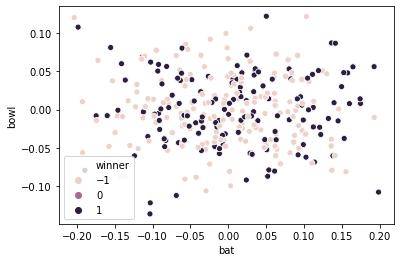

In [739]:
sns.scatterplot('bat', 'bowl', data=data_model, hue='winner')

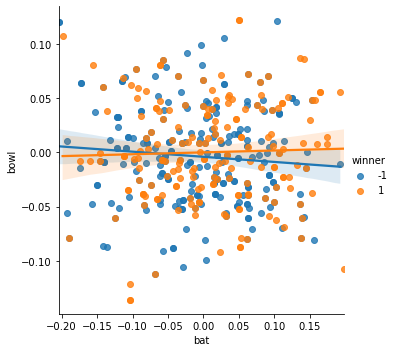

In [740]:
sns.lmplot('bat', 'bowl', data=data_model, hue='winner')

In [755]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [779]:
clf_linear = svm.SVC(kernel='linear')
clf = svm.SVC()
lreg = LogisticRegression()
rfc = RandomForestClassifier()

In [768]:
from sklearn.model_selection import train_test_split

In [769]:
test = data_model.loc[372:431]

In [770]:
x_train, x_val, y_train, y_val = train_test_split(data_model[['bat', 'bowl']].loc[:372], data_model['winner'].loc[:372], test_size=0.2)

In [771]:
from sklearn.metrics import accuracy_score

In [780]:
clf_linear.fit(x_train, y_train)
pred_clf_linear=clf_linear.predict(x_val)
accuracy_score(pred_clf_linear, y_val)

0.56

In [781]:
clf.fit(x_train, y_train)
pred_clf=clf.predict(x_val)
accuracy_score(pred_clf, y_val)

0.56

In [782]:
lreg.fit(x_train, y_train)
pred_lreg=lreg.predict(x_val)
accuracy_score(pred_lreg, y_val)

0.56

In [783]:
rfc.fit(x_train, y_train)
pred_rfc=rfc.predict(x_val)
accuracy_score(pred_rfc, y_val)

0.5333333333333333

In [642]:
X=data[['bat1', 'bowl1', 'bat2', 'bowl2']].loc[:518]
Y=data['winner'].loc[:518]

In [643]:
X
Y

0      1
1     -1
2     -1
3     -1
4     -1
      ..
514   -1
515    1
516    1
517   -1
518   -1
Name: winner, Length: 519, dtype: int64

In [644]:
test_data=data.loc[518:577]
x_train1, x_val1, y_train1, y_val1 = train_test_split(X, Y, test_size=0.2)

In [645]:
clf_linear.fit(x_train1, y_train1)
pred_clf_linear1=clf_linear.predict(x_val1)
accuracy_score(pred_clf_linear1, y_val1)

0.5192307692307693

In [646]:
clf.fit(x_train1, y_train1)
pred_clf1=clf.predict(x_val1)
accuracy_score(pred_clf1, y_val1)

0.5096153846153846

In [647]:
lreg.fit(x_train1, y_train1)
pred_lreg1=lreg.predict(x_val1)
accuracy_score(pred_lreg1, y_val1)

0.5192307692307693

In [648]:
rfc.fit(x_train1, y_train1)
pred_rfc1=rfc.predict(x_val1)
accuracy_score(pred_rfc1, y_val1)

0.5673076923076923

In [653]:
lreg.fit(x_train, y_train)
pred_lreg=lreg.predict(x_val)
accuracy_score(pred_lreg, y_val)

0.5288461538461539

In [654]:
pred_lreg_test=lreg.predict(test[['bat', 'bowl']])
accuracy_score(pred_lreg_test, test['winner'])

0.6101694915254238

In [655]:
rfc.fit(x_train1, y_train1)
pred_rfc1=rfc.predict(x_val1)
accuracy_score(pred_rfc1, y_val1)

0.5865384615384616

In [656]:
pred_rfc_test=rfc.predict(test_data[['bat1', 'bowl1', 'bat2', 'bowl2']])
accuracy_score(pred_rfc_test, test_data['winner'])

0.5254237288135594

In [806]:
players_CSK = ['AT Rayudu',
'DJ Bravo',
'DL Chahar',
'F du Plessis',
'Imran Tahir',
'Josh Hazlewood',
'Karn Sharma',
'KM Asif',
'KM Jadhav',
'L Ngidi',
'M Vijay',
'MJ Santner',
'Monu Kumar',
'MS Dhoni',
'Narayan Jagadeesan',
'PP Chawla',
'R Sai Kishore',
'RA Jadeja',
'Ruturaj Gaikwad',
'SM Curran',
'SN Thakur',
'SR Watson']

In [800]:
players_MI = ['AP Tare', 'Anmolpreet Singh', 'Anukul Roy', 'CA Lynn', 'DS Kulkarni','Digvijay Deshmukh','HH Pandya','Ishan Kishan','J Yadav','James Pattinson','JJ Bumrah','KA Pollard','KH Pandya','MJ McClenaghan','Mohsin Khan','NM Coulter-Nile','Prince Balwant Rai Singh','Q de Kock','RD Chahar','RG Sharma','SA Yadav','Saurabh Tiwary','SE Rutherfo','TA Boult']

In [813]:
players_SRH = ['Abdul Samad',
'Abhishek Sharma',
'B Kumar',
'B Stanlake',
'Basil Thampi',
'DA Warner',
'Fabian Allen',
'JM Bairstow',
'KK Ahmed',
'KS Williamson',
'MK Pandey',
'Mohammad Nabi',
'MR Marsh',
'Priyam Garg',
'Rashid Khan',
'S Kaul',
'S Nadeem',
'Sandeep Bavanaka',
'Sandeep Sharma',
'Sanjay Yadav',
'SP Goswami',
'T Natarajan',
'V Shankar',
'Virat Singh',
'WP Saha']

In [828]:
players_KKR = ['AD Russell',
'Ali Khan',
'Chris Green',
'CV Varun',
'EJG Morgan',
'Kamlesh Nagarkoti',
'KD Karthik',
'Kuldeep Yadav',
'LH Ferguson',
'M Prasidh Krishna',
'M Siddharth',
'N Rana',
'NS Naik',
'PJ Cummins',
'RA Tripathi',
'RK Singh',
'S Sandeep Warrier',
'SD Lad',
'Shivam Mavi',
'Shubman Gill',
'SP Narine',
'Tom Banton']

In [820]:
players_RR = ['AJ Tye',
'Akash Singh',
'Anirudha Joshi',
'Anuj Rawat',
'AS Rajpoot',
'BA Stokes',
'DA Miller',
'JC Archer',
'JC Buttler',
'JD Unadkat',
'Kartik Tyagi',
'M Markande',
'M Vohra',
'MK Lomror',
'O Thomas',
'R Parag',
'R Tewatia',
'RV Uthappa',
'S Gopal',
'Shashank Singh',
'SPD Smith',
'SV Samson',
'TK Curran',
'VR Aaron',
'Yashasvi Jaiswal']

In [818]:
players_RCB = [
'A Zampa',
'AB de Villiers',
'AJ Finch',
'CH Morris',
'Devdutt Padikkal',
'DW Steyn',
'Gurkeerat Singh',
'Isuru Udana',
'Josh Philippe',
'MM Ali',
'Mohammed Siraj',
'NA Saini',
'P Negi',
'PA Patel',
'Pavan Deshpande',
'S Dube',
'Shahbaz Ahamad',
'UT Yadav',
'V Kohli',
'Washington Sundar',
'YS Chahal']

In [809]:
players_DC = ['AM Rahane',
'Alex Carey',
'Anrich Nortje',
'Avesh Khan',
'Daniel Sams',
'Lalith Yadav',
'MP Stoinis',
'MM Sharma',
'SO Hetmyer',
'SS Iyer',
'Tushar Deshpande',
'A Mishra',
'AR Patel',
'HV Patel',
'I Sharma',
'K Rabada',
'KMA Paul',
'PP Shaw',
'R Ashwin',
'RR Pant',
'S Dhawan',
'S Lamichhane']

In [811]:
players_KXIP = ['Arshdeep Singh',
'CH Gayle',
'GC Viljoen',
'Harpreet Brar',
'KL Rahul',
'M Ashwin',
'MA Agarwal',
'Mandeep Singh',
'Mohammed Shami',
'Mujeeb Ur Rahman',
'N Pooran',
'CJ Jordan',
'Darshan Nalkande',
'DJ Hooda',
'GJ Maxwell',
'Ishan Porel',
'Jagadeesha Suchith',
'JDS Neesham',
'KK Nair',
'K Gowtham',
'R Bishnoi',
'Sarfaraz Khan',
'Sheldon Cottrell',
'P Simran Singh',
'Tajinder Singh']

In [829]:
stats=[]
for player in players_KKR:
    stats.append(list(players[players.Season<2020][players.Player_Name==player].mean()[1:3]))
stats=np.array(stats)
rate_KKR = np.nanmean(stats, axis=0)

In [815]:
rate_SRH

array([0.60538494, 0.56169851])

In [658]:
lreg.predict([rate_CSK-rate_MI])

array([-1], dtype=int64)

In [848]:
def match(team1, team2, model, random_scale=2.5):
    match=pd.DataFrame(columns=['bat1', 'bowl1', 'bat2', 'bowl2'], index=[0])
    bat1=team1[0]
    bowl1=team1[1]
    bat2=team2[0]
    bowl2=team2[1]
    match['bat1'] = np.random.normal(bat1, scale=random_scale)
    match['bat2'] = np.random.normal(bat2, scale=random_scale)
    match['bowl1'] = np.random.normal(bowl1, scale=random_scale)
    match['bowl2'] = np.random.normal(bowl2, scale=random_scale)
    match['bat']=match['bat1']-match['bat2']
    match['bowl']=match['bowl1']-match['bowl2']
    match=match[['bat', 'bowl']]
    match_array=match.values
    winner = model.predict(match_array)
    return winner

In [840]:
def simulate(team1, team2, iters=1000):
    match_results=[]
    for i in range(iters):
        match_results.append(match(team1, team2, sgd))
    team1_proba = match_results.count(1)/len(match_results)*100
    team2_proba = match_results.count(-1)/len(match_results)*100
    print('Team1:{} \nTeam2:{}'.format(team1_proba, team2_proba))

In [826]:
%%time
simulate([0.70, 0.50], [0.95, 0.60])

Team1:48.8 /nTeam2:51.2
Wall time: 8.87 s


In [784]:
from sklearn.linear_model import SGDClassifier

In [797]:
sgd_log = SGDClassifier(loss='log', max_iter=1000)
sgd = SGDClassifier(max_iter=1000)

In [798]:
sgd_log.fit(x_train, y_train)
pred_sgd_log = sgd_log.predict(x_val)
accuracy_score(pred_sgd_log, y_val)

0.56

In [799]:
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_val)
accuracy_score(pred_sgd, y_val)

0.5733333333333334

In [849]:
%%time
simulate(rate_CSK, rate_MI)

Team1:49.0 
Team2:51.0
Wall time: 11.3 s


In [850]:
%%time
simulate(rate_DC, rate_KXIP)

Team1:49.2 
Team2:50.8
Wall time: 12 s


In [851]:
%%time
simulate(rate_SRH, rate_RCB)

Team1:48.699999999999996 
Team2:51.300000000000004
Wall time: 13.1 s


In [852]:
%%time
simulate(rate_RR, rate_CSK)

Team1:47.599999999999994 
Team2:52.400000000000006
Wall time: 12.7 s


In [853]:
%%time
simulate(rate_KKR, rate_MI)

Team1:46.800000000000004 
Team2:53.2
Wall time: 12.7 s


In [854]:
%%time
simulate(rate_KXIP, rate_RCB)

Team1:49.2 
Team2:50.8
Wall time: 12.1 s


In [855]:
%%time
simulate(rate_CSK, rate_DC)

Team1:55.00000000000001 
Team2:45.0
Wall time: 12.1 s


In [4]:
!pip install jovian --upgrade 

Requirement already up-to-date: jovian in c:\users\sarda\anaconda3\lib\site-packages (0.2.18)


In [6]:
import jovian
jovian.commit(output=['matches_final.csv', 'GL_IPL2020-2.xlsx'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sarda-ashutosh4/model-building" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sarda-ashutosh4/model-building


'https://jovian.ml/sarda-ashutosh4/model-building'

kkr
rr
mi
dc
kkr
mi
csk